<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_3_Proposal_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: imports and robust load (use your upload pattern)
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from PIL import Image

# visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# If you want to upload now, uncomment:
# uploaded = files.upload()

# Try a few likely filenames (archive(2), AB_NYC_2019.csv, menu.csv etc)
candidates = ['archive(2).zip', 'archive(2).csv', 'archive(2)', 'AB_NYC_2019.csv', 'menu.csv', 'archive.csv']

df = None
for name in candidates:
    try:
        # if it's a zip with CSV inside, pandas can read if we provide compression param or use zipfile
        if name.endswith('.zip'):
            try:
                df = pd.read_csv(name)
                print(f"Loaded {name}")
                break
            except Exception:
                # try to open zip to find a csv
                import zipfile
                with zipfile.ZipFile(name, 'r') as z:
                    # pick first .csv in zip
                    for member in z.namelist():
                        if member.lower().endswith('.csv'):
                            with z.open(member) as f:
                                df = pd.read_csv(f)
                                print(f"Loaded {member} from {name}")
                                break
                    if df is not None:
                        break
        else:
            df = pd.read_csv(name)
            print(f"Loaded {name}")
            break
    except FileNotFoundError:
        continue
    except pd.errors.EmptyDataError:
        continue

# If nothing loaded yet, try to read AB_NYC_2019 that was uploaded to /mnt/data
if df is None:
    try:
        df = pd.read_csv('/mnt/data/AB_NYC_2019.csv')
        print("Loaded /mnt/data/AB_NYC_2019.csv")
    except Exception as e:
        print("No candidate file found in working dir. Please upload manually with files.upload().")
        uploaded = files.upload()
        first_name = list(uploaded.keys())[0]
        df = pd.read_csv(first_name)
        print(f"Loaded uploaded file: {first_name}")

# show shape and head
print("DataFrame shape:", df.shape)
display(df.head())


No candidate file found in working dir. Please upload manually with files.upload().


Saving AB_NYC_2019.csv to AB_NYC_2019.csv
Loaded uploaded file: AB_NYC_2019.csv
DataFrame shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Cell 2: inspect columns and datatypes
print("Columns:")
print(df.columns.tolist())
print("\nTypes and non-null counts:")
display(df.info())
print("\nBasic head:")
display(df.head())


Columns:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-nul

None


Basic head:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Cell 3: cleaning and making numeric-safe copies
# 1) Strip whitespace from column names and standardize lower_case
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# 2) Drop exact duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows found:", dup_count)
if dup_count:
    df = df.drop_duplicates()
    print("Dropped duplicates. New shape:", df.shape)

# 3) Ensure numeric columns are numeric (price, latitude, longitude, number_of_reviews, etc.)
num_candidates = ['price', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month',
                  'minimum_nights', 'calculated_host_listings_count', 'availability_365']
for c in num_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 4) Parse dates safely (if present)
date_cols = [c for c in df.columns if 'date' in c or 'last_review' in c]
for c in date_cols:
    try:
        df[c] = pd.to_datetime(df[c], errors='coerce')
    except Exception:
        pass

# 5) Quick check for missing lat/lon
print("Missing lat:", df['latitude'].isna().sum() if 'latitude' in df.columns else "no latitude column")
print("Missing lon:", df['longitude'].isna().sum() if 'longitude' in df.columns else "no longitude column")

# 6) show summary
display(df.describe(include='all').transpose().head(20))


Duplicate rows found: 0
Missing lat: 0
Missing lon: 0


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,48895.0,NaN,NaN,NaN,19017143.23618,2539.0,9471945.0,19677284.0,29152178.5,36487245.0,10983108.38561
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,2438.0,7822033.0,30793816.0,107434423.0,274321313.0,78610967.032667
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,40.49979,40.6901,40.72307,40.763115,40.91306,0.05453
longitude,48895.0,NaN,NaN,NaN,-73.95217,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299,0.046157
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,0.0,69.0,106.0,175.0,10000.0,240.15417


In [ ]:
# Cell 4: key summary metrics
print("Total rows (listings):", df.shape[0])
if 'price' in df.columns:
    print("Price summary (min/median/mean/max):", df['price'].min(), df['price'].median(), round(df['price'].mean(),2), df['price'].max())

if 'neighbourhood_group' in df.columns:
    print("\nListings by borough (neighbourhood_group):")
    print(df['neighbourhood_group'].value_counts())

# Top 10 neighborhoods by total listings
if 'neighbourhood' in df.columns:
    top_nb = df['neighbourhood'].value_counts().head(10)
    print("\nTop 10 neighbourhoods by number of listings:")
    print(top_nb)

# Top 10 by average price
if 'neighbourhood_group' in df.columns and 'price' in df.columns:
    avg_price_borough = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    print("\nAverage price by borough:")
    print(avg_price_borough)


Total rows (listings): 48895
Price summary (min/median/mean/max): 0 106.0 152.72 10000

Listings by borough (neighbourhood_group):
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Top 10 neighbourhoods by number of listings:
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

Average price by borough:
neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


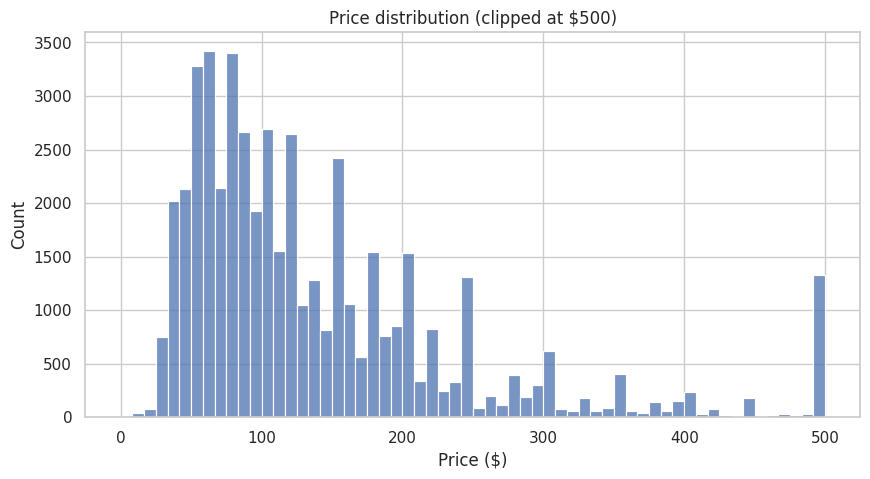

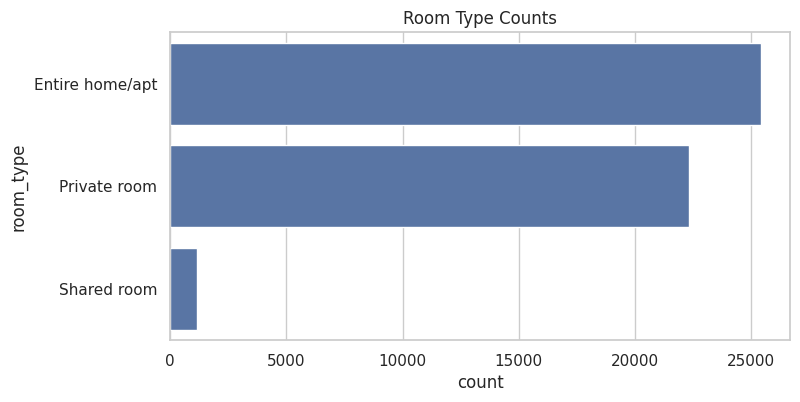

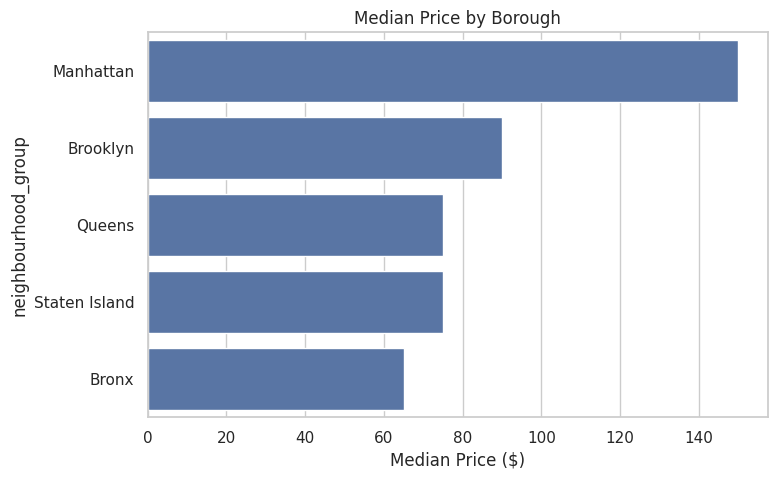

In [ ]:
# Cell 5: visualizations
plt.figure(figsize=(10,5))
if 'price' in df.columns:
    sns.histplot(df['price'].clip(upper=500).dropna(), bins=60, kde=False)  # clip to 500 for readability
    plt.title("Price distribution (clipped at $500)")
    plt.xlabel("Price ($)")
    plt.show()

# Room type counts
if 'room_type' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index)
    plt.title("Room Type Counts")
    plt.show()

# Borough average price barplot
if 'neighbourhood_group' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8,5))
    order = df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False).index
    sns.barplot(x=df.groupby('neighbourhood_group')['price'].median().loc[order].values, y=order)
    plt.xlabel("Median Price ($)")
    plt.title("Median Price by Borough")
    plt.show()


Map image not found in default paths. Please upload the PNG now:


Saving New_York_City_.png to New_York_City_.png
Loaded uploaded image: New_York_City_.png
Longitude range: -74.24442 to -73.71299
Latitude range: 40.49979 to 40.91306


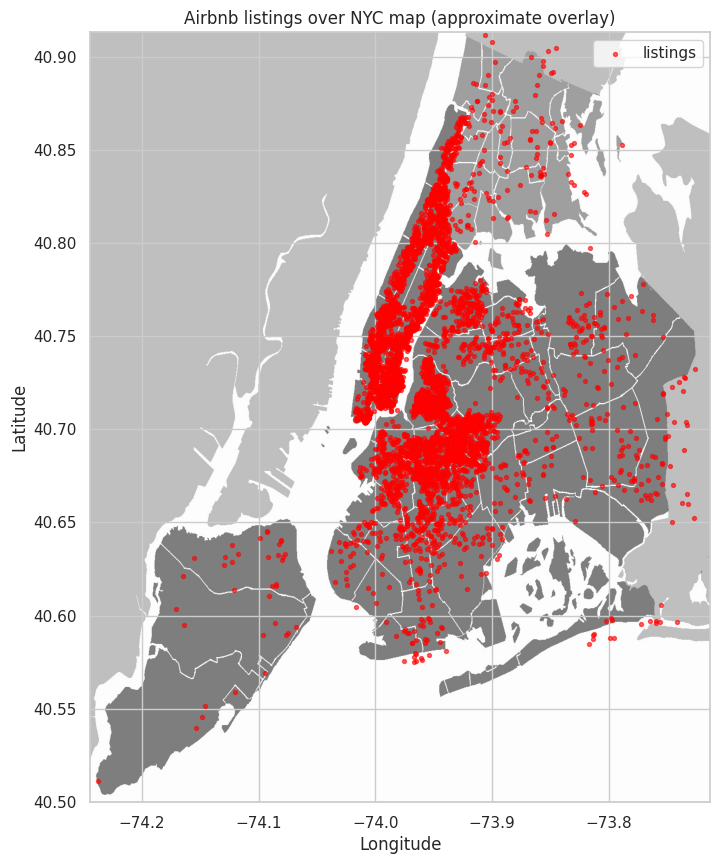

In [ ]:
# Cell 6: map overlay scatter
import os

# Load image (try /mnt/data first)
img_path_candidates = ['/mnt/data/New_York_City_.png', 'New_York_City_.png', 'new_york_city_.png', 'New_York_City.png']
img = None
for p in img_path_candidates:
    if os.path.exists(p):
        img = Image.open(p)
        print("Loaded map image from:", p)
        break

if img is None:
    print("Map image not found in default paths. Please upload the PNG now:")
    uploaded = files.upload()
    img_name = list(uploaded.keys())[0]
    img = Image.open(io.BytesIO(uploaded[img_name]))
    print("Loaded uploaded image:", img_name)

# Compute extents from lat/lon in dataset (this gives approximate coordinate bounds)
if 'latitude' in df.columns and 'longitude' in df.columns:
    min_lon, max_lon = df['longitude'].min(), df['longitude'].max()
    min_lat, max_lat = df['latitude'].min(), df['latitude'].max()

    print("Longitude range:", min_lon, "to", max_lon)
    print("Latitude range:", min_lat, "to", max_lat)

    # Plot image and scatter points. We flip y axis because image origin is top-left.
    fig, ax = plt.subplots(figsize=(8,10))
    ax.imshow(img, extent=(min_lon, max_lon, min_lat, max_lat), aspect='auto', alpha=0.9)
    # sample for performance if too many points
    sample = df.dropna(subset=['latitude','longitude'])
    if sample.shape[0] > 5000:
        sample = sample.sample(5000, random_state=1)
    ax.scatter(sample['longitude'], sample['latitude'], s=8, c='red', alpha=0.6, label='listings')
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Airbnb listings over NYC map (approximate overlay)")
    ax.legend()
    plt.show()
else:
    print("Data has no latitude/longitude columns to plot.")


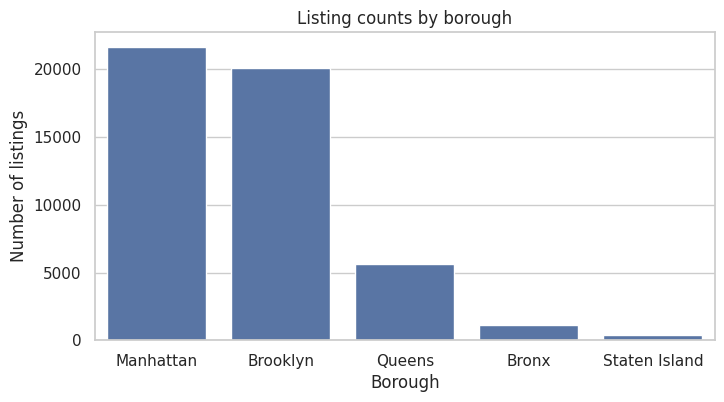

In [ ]:
# Cell 7: borough counts bar chart & heatmap-like grid
if 'neighbourhood_group' in df.columns:
    counts = df['neighbourhood_group'].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title("Listing counts by borough")
    plt.ylabel("Number of listings")
    plt.xlabel("Borough")
    plt.show()
else:
    print("No 'neighbourhood_group' column found.")


DataSet 2

In [ ]:
# Cell 1: imports and upload (use your preferred upload flow)
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, json
from IPython.display import display

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# If you haven't uploaded files via the Colab UI yet, uncomment this:
# uploaded = files.upload()

# Try to load CSVs/JSONs from working directory or /mnt/data
search_paths = ['*.csv', '/mnt/data/*.csv', '*.json', '/mnt/data/*.json']
csv_files = []
json_files = []
for patt in search_paths:
    for f in glob.glob(patt):
        if f.lower().endswith('.csv'):
            csv_files.append(f)
        elif f.lower().endswith('.json'):
            json_files.append(f)

# Deduplicate and sort
csv_files = sorted(list(dict.fromkeys(csv_files)))
json_files = sorted(list(dict.fromkeys(json_files)))

print("Found CSV files:", csv_files)
print("Found JSON files:", json_files)

# If nothing found, ask user to upload (this uses your upload flow)
if not csv_files:
    print("No CSV files found in the environment. Please upload (choose the CSV files from the youtube-new dataset).")
    uploaded = files.upload()
    csv_files = [name for name in uploaded.keys() if name.lower().endswith('.csv')]
    json_files = [name for name in uploaded.keys() if name.lower().endswith('.json')]
    print("Uploaded:", csv_files + json_files)

# Safety check
if not csv_files:
    raise FileNotFoundError("No CSV files available. Upload the dataset CSVs (e.g., USvideos.csv) and re-run.")


Found CSV files: ['AB_NYC_2019.csv']
Found JSON files: []


In [ ]:
# Cell 2: load CSVs into DataFrames dictionary
dfs = {}
for f in csv_files:
    country_code = os.path.basename(f).split('videos')[0].upper().replace('.CSV','').strip().replace('VIDEOS','').strip()
    try:
        dfs[country_code] = pd.read_csv(f)
        print(f"Loaded {f} -> key '{country_code}', shape {dfs[country_code].shape}")
    except Exception as e:
        print("Failed to load", f, ":", e)

# Inspect columns of first loaded DF (example)
first_key = list(dfs.keys())[0]
print("\nColumns in", first_key, "dataset:")
print(dfs[first_key].columns.tolist())
display(dfs[first_key].head())


Loaded AB_NYC_2019.csv -> key 'AB_NYC_2019', shape (48895, 16)

Columns in AB_NYC_2019 dataset:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Cell 3: read category JSONs and build id->name maps per country (if available)
cat_maps = {}  # e.g., 'US' -> { '1': 'Film & Animation', ...}

for jf in json_files:
    name = os.path.basename(jf)
    country = name.split('_category_id')[0].upper()
    try:
        with open(jf, 'r', encoding='utf-8') as fh:
            j = json.load(fh)
            items = j.get('items', [])
            mapping = { item['id']: item['snippet']['title'] for item in items if 'id' in item and 'snippet' in item }
            cat_maps[country] = mapping
            print(f"Loaded categories for {country}, {len(mapping)} categories")
    except Exception as e:
        print("Failed to load JSON", jf, ":", e)

print("\nExamples of category maps keys:", list(cat_maps.keys())[:5])



Examples of category maps keys: []


In [ ]:
# Cell 4: standardize columns, coerce numeric, parse dates, add country column, map categories

def prepare_df(df, country_code):
    df = df.copy()
    # standardize column names to lowercase and underscores
    df.columns = [c.strip().lower().replace(' ','_') for c in df.columns]

    # add country column
    df['country'] = country_code

    # convert numeric columns
    for col in ['views','likes','dislikes','comment_count']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # parse dates
    if 'trending_date' in df.columns:
        # trending_date in dataset is 'yy.dd.mm' e.g. '17.14.11' -> fix format
        try:
            df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
        except Exception:
            df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
    if 'publish_time' in df.columns:
        df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    return df

# Apply to all
for k in list(dfs.keys()):
    dfs[k] = prepare_df(dfs[k], k)
    print(k, "->", dfs[k].shape, "cols:", dfs[k].columns.tolist()[:10])


AB_NYC_2019 -> (48895, 17) cols: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price']


In [ ]:
# Cell 5: map category ids using cat_maps and then concat all datasets into one
for k, df_k in dfs.items():
    if 'category_id' in df_k.columns:
        # category_id may be numeric type; convert to string to match JSON keys
        df_k['category_id'] = df_k['category_id'].astype(str)
        if k in cat_maps:
            df_k['category_name'] = df_k['category_id'].map(cat_maps[k]).fillna('Unknown')
        else:
            df_k['category_name'] = df_k['category_id']  # keep id if no map
        dfs[k] = df_k

# Combine all country dataframes
combined = pd.concat(dfs.values(), axis=0, ignore_index=True, sort=False)
print("Combined shape:", combined.shape)
display(combined.head())


Combined shape: (48895, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,country
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,AB_NYC_2019
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,AB_NYC_2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,AB_NYC_2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,AB_NYC_2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,AB_NYC_2019


✅ Columns in dataset:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'country']

Shape: (48895, 17)

Missing values (top 10):


,0
reviews_per_month,10052
last_review,10052
host_name,21
name,16
id,0
neighbourhood,0
latitude,0
host_id,0
neighbourhood_group,0
room_type,0



💰 Top 10 Most Expensive Listings:


,name,host_name,neighbourhood_group,price,room_type
9151,Furnished room in Astoria apartment,Kathrine,Queens,10000,Private room
29238,1-BR Lincoln Center,Jelena,Manhattan,10000,Entire home/apt
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,10000,Entire home/apt
40433,2br - The Heart of NYC: Manhattans Lower East ...,Matt,Manhattan,9999,Entire home/apt
12342,"Quiet, Clean, Lit @ LES & Chinatown",Amy,Manhattan,9999,Private room
6530,Spanish Harlem Apt,Olson,Manhattan,9999,Entire home/apt
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Rum,Manhattan,8500,Entire home/apt
4377,Film Location,Jessica,Brooklyn,8000,Entire home/apt
29662,East 72nd Townhouse by (Hidden by Airbnb),Sally,Manhattan,7703,Entire home/apt
42523,70' Luxury MotorYacht on the Hudson,Jack,Manhattan,7500,Entire home/apt



🏠 Top 10 Hosts by Number of Listings:


,count
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279
Blueground,232
Sarah,227
Daniel,226
Jessica,205



📊 Average Price by Neighbourhood Group:


,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


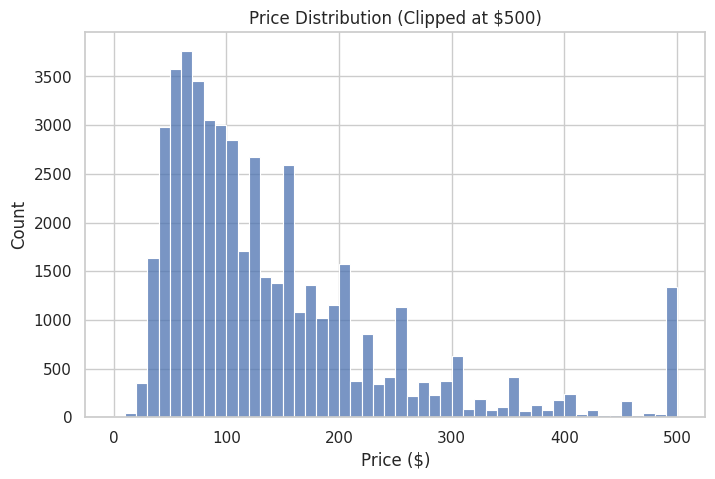

In [ ]:
# ✅ Cell 6 — Basic EDA for Airbnb NYC data

# Normalize column names (safe, once)
combined.columns = combined.columns.str.strip().str.lower().str.replace(' ', '_')

print("✅ Columns in dataset:")
print(combined.columns.tolist())
print("\nShape:", combined.shape)

# Missing values
print("\nMissing values (top 10):")
display(combined.isnull().sum().sort_values(ascending=False).head(10))

# 🔹 Top 10 listings by price
top_listings = combined[['name', 'host_name', 'neighbourhood_group', 'price', 'room_type']].dropna()
top_listings = top_listings.sort_values('price', ascending=False).head(10)
print("\n💰 Top 10 Most Expensive Listings:")
display(top_listings)

# 🔹 Top hosts by number of listings
top_hosts = combined['host_name'].value_counts().head(10)
print("\n🏠 Top 10 Hosts by Number of Listings:")
display(top_hosts)

# 🔹 Average price by neighbourhood group
avg_price_by_area = combined.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
print("\n📊 Average Price by Neighbourhood Group:")
display(avg_price_by_area)

# 🔹 Distribution of prices (clip for visibility)
plt.figure(figsize=(8,5))
sns.histplot(combined['price'].clip(upper=500), bins=50, kde=False)
plt.title('Price Distribution (Clipped at $500)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Check your column names
print("Actual columns in combined DataFrame:\n")
print(combined.columns.tolist())


Actual columns in combined DataFrame:

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'country']


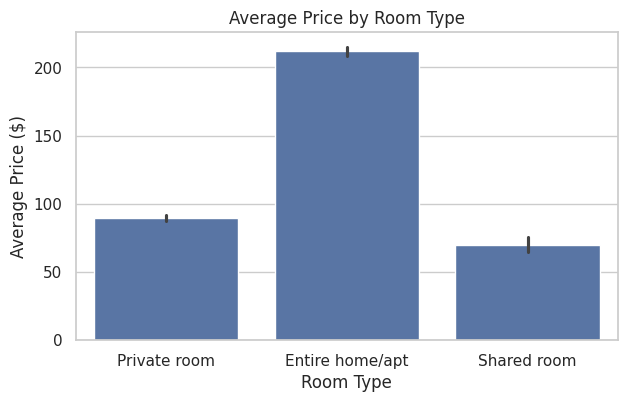

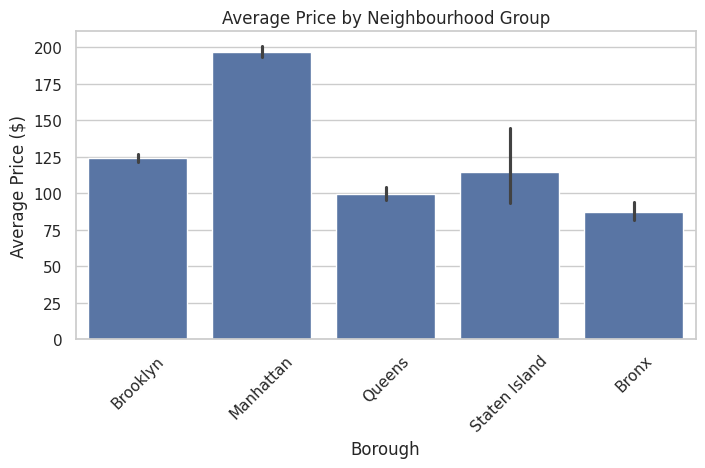

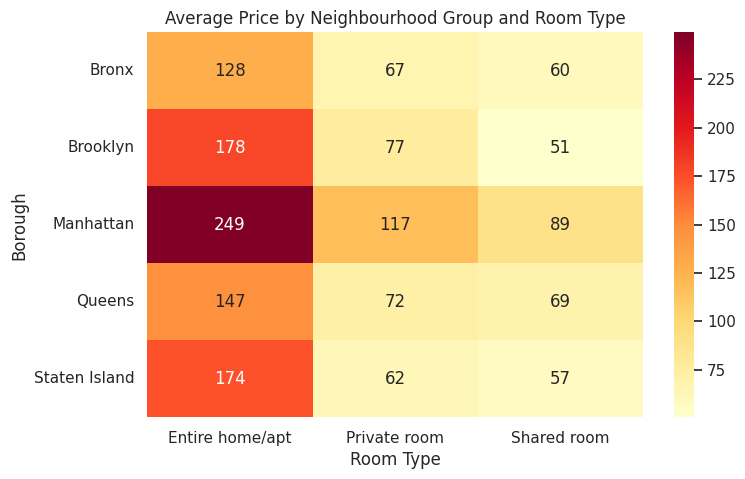

In [ ]:
# Cell 7 — Average Price by Room Type and Neighbourhood Group

# Average price by room type
plt.figure(figsize=(7,4))
sns.barplot(x='room_type', y='price', data=combined, estimator=np.mean)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.xlabel('Room Type')
plt.show()

# Average price by neighbourhood group
plt.figure(figsize=(8,4))
sns.barplot(x='neighbourhood_group', y='price', data=combined, estimator=np.mean)
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.show()

# Combined pivot heatmap: borough × room type
pivot_table = combined.pivot_table(values='price',
                                   index='neighbourhood_group',
                                   columns='room_type',
                                   aggfunc='mean').fillna(0)
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Average Price by Neighbourhood Group and Room Type')
plt.ylabel('Borough')
plt.xlabel('Room Type')
plt.show()


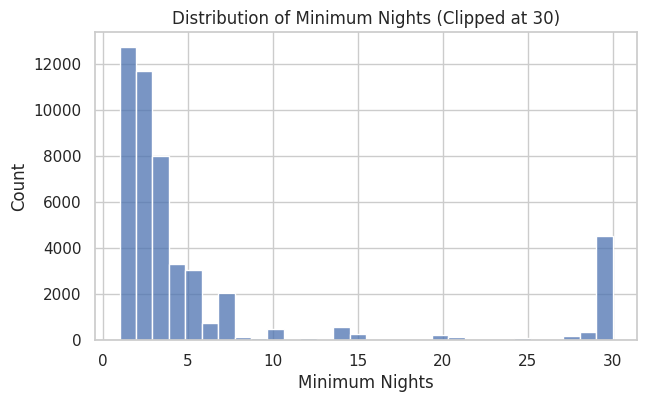

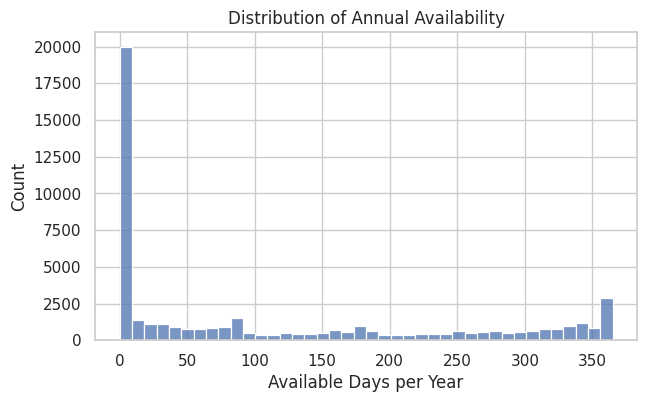

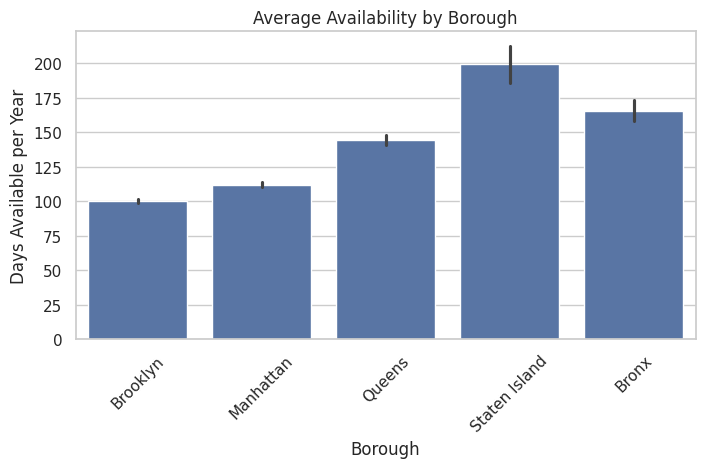

In [ ]:
# Cell 8 — Availability and Minimum Nights

plt.figure(figsize=(7,4))
sns.histplot(combined['minimum_nights'].clip(upper=30), bins=30, kde=False)
plt.title('Distribution of Minimum Nights (Clipped at 30)')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(combined['availability_365'], bins=40, kde=False)
plt.title('Distribution of Annual Availability')
plt.xlabel('Available Days per Year')
plt.ylabel('Count')
plt.show()

# Average availability by borough
plt.figure(figsize=(8,4))
sns.barplot(x='neighbourhood_group', y='availability_365', data=combined, estimator=np.mean)
plt.title('Average Availability by Borough')
plt.ylabel('Days Available per Year')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.show()


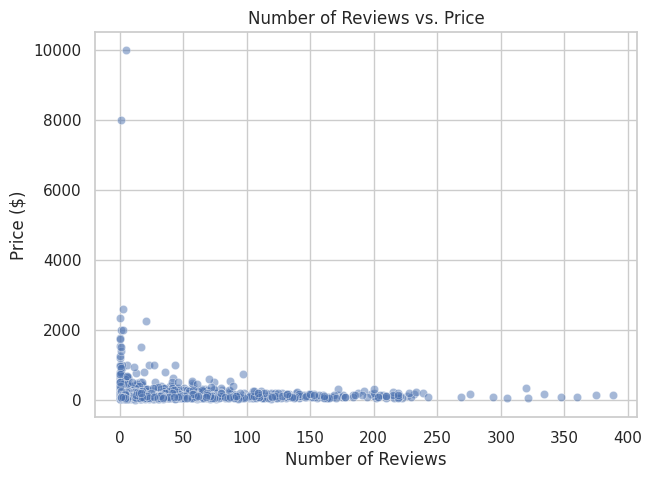

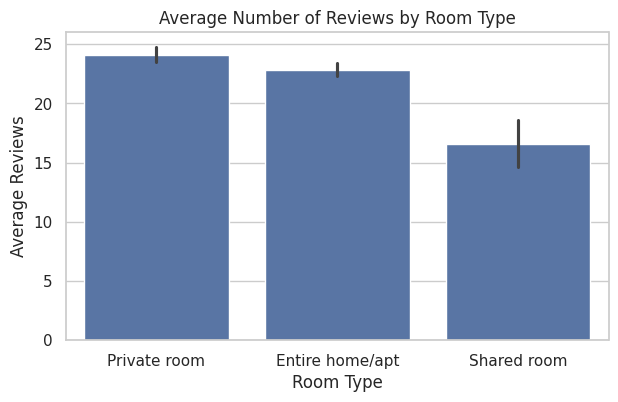

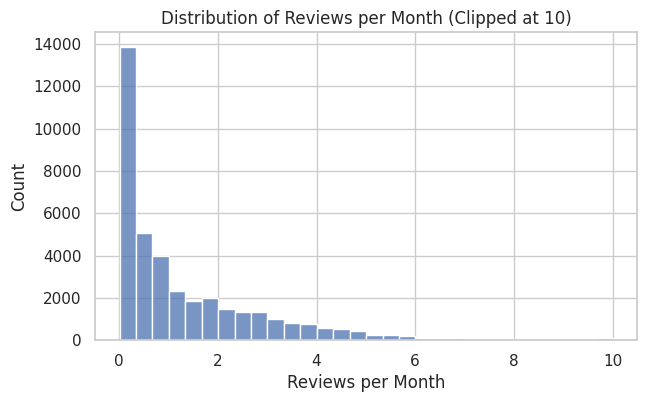

In [ ]:
# Cell 9 — Reviews and Host Activity

# Number of reviews vs. price (scatter)
plt.figure(figsize=(7,5))
sns.scatterplot(x='number_of_reviews', y='price',
                data=combined.sample(min(3000, combined.shape[0]), random_state=42),
                alpha=0.5)
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

# Average number of reviews by room type
plt.figure(figsize=(7,4))
sns.barplot(x='room_type', y='number_of_reviews', data=combined, estimator=np.mean)
plt.title('Average Number of Reviews by Room Type')
plt.ylabel('Average Reviews')
plt.xlabel('Room Type')
plt.show()

# Reviews per month (activity)
plt.figure(figsize=(7,4))
sns.histplot(combined['reviews_per_month'].dropna().clip(upper=10), bins=30, kde=False)
plt.title('Distribution of Reviews per Month (Clipped at 10)')
plt.xlabel('Reviews per Month')
plt.ylabel('Count')
plt.show()


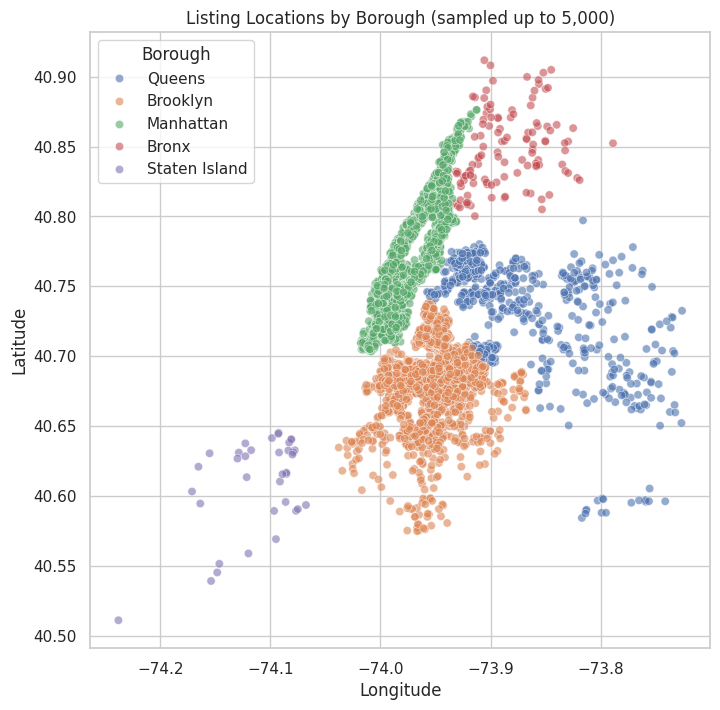

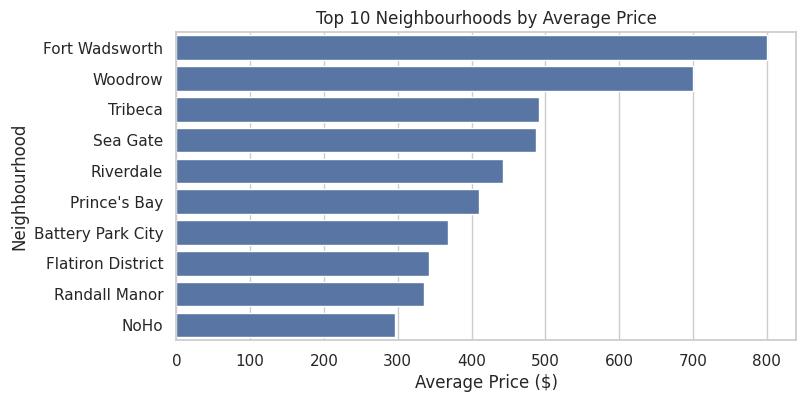

In [ ]:
# Cell 10 — Simple Geographic Scatter of Listings

plt.figure(figsize=(8,8))
sns.scatterplot(x='longitude', y='latitude',
                data=combined.sample(min(5000, combined.shape[0]), random_state=1),
                hue='neighbourhood_group', alpha=0.6)
plt.title('Listing Locations by Borough (sampled up to 5,000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough')
plt.show()

# Average price by neighbourhood (top 10)
neigh_prices = combined.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=neigh_prices.values, y=neigh_prices.index)
plt.title('Top 10 Neighbourhoods by Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighbourhood')
plt.show()


In [ ]:
# Cell 11 — Correlation Heatmap

numeric_cols = ['price', 'minimum_nights', 'number_of_reviews',
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

corr = combined[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


In [ ]:
# Cell 12 — Text summary of insights

print("🔍 Key Insights Summary")
print("- Total Listings:", len(combined))
print("- Average Price:", round(combined['price'].mean(),2))
print("- Most Expensive Borough:", combined.groupby('neighbourhood_group')['price'].mean().idxmax())
print("- Cheapest Borough:", combined.groupby('neighbourhood_group')['price'].mean().idxmin())
print("- Room Type with Highest Average Price:", combined.groupby('room_type')['price'].mean().idxmax())
print("- Room Type with Most Listings:", combined['room_type'].value_counts().idxmax())
print("- Host with Most Listings:", combined['host_name'].value_counts().idxmax())


🔍 Key Insights Summary
- Total Listings: 48895
- Average Price: 152.72
- Most Expensive Borough: Manhattan
- Cheapest Borough: Bronx
- Room Type with Highest Average Price: Entire home/apt
- Room Type with Most Listings: Entire home/apt
- Host with Most Listings: Michael
